In [1]:
import sys
sys.path.append(r'C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Regression\house_prices_tf')

In [2]:
import yaml
yaml_path = r"C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Regression\house_prices_tf\src\config.yaml"
with open(yaml_path, "r", encoding="utf-8") as f:
    config = yaml.safe_load(f)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Read Dataset

In [4]:
X_train = pd.read_parquet(r'..\data\processed\feat_X_train.parquet')
y_train = pd.read_parquet(r'..\data\processed\feat_y_train.parquet')

In [6]:
# X_train.drop(columns=config['model_selection']['cols_2_drop'], inplace=True)

In [7]:
df = pd.concat([X_train, y_train], axis=1)
df.head()

numerical_pipe__OverallQual  numerical_pipe__OverallCond  \
979                     -0.800691                     0.364615   
357                     -0.800691                    -0.526576   
1318                     1.374884                    -0.526576   
346                     -0.075499                     2.146997   
1284                    -0.075499                     1.255806   

      numerical_pipe__YearBuilt  numerical_pipe__YearRemodAdd  \
979                   -0.259772                     -1.031140   
357                    0.173841                     -0.402170   
1318                   1.007711                      0.855770   
346                   -0.359836                      0.662241   
1284                  -1.727384                      0.275183   

      numerical_pipe__GrLivArea  numerical_pipe__HalfBath  \
979                   -0.773719                 -0.780568   
357                   -0.733869                  1.207157   
1318                   0.490085                 -0.780568   
346                   -1.083028                 -0.780568   
1284                   1.742503                 -0.780568   

      numerical_pipe__BedroomAbvGr  numerical_pipe__GarageArea  \
979                       0.135699                    0.048156   
357                       0.135699                    0.274008   
1318                      0.135699                    1.309159   
346                      -1.084284                   -0.794081   
1284                      1.355682                   -0.629397   

      numerical_pipe__LotArea  numerical_pipe__MasVnrArea  ...  \
979                 -0.240175                   -0.606669  ...   
357                 -0.995217                   -0.606669  ...   
1318                 0.740624                    0.447357  ...   
346                  0.410293                   -0.606669  ...   
1284                -0.105017                   -0.606669  ...   

      categorical_pipe__KitchenQual_TA  categorical_pipe__KitchenQual_Gd  \
979                           0.957960                         -0.791861   
357                           0.957960                         -0.791861   
1318                         -1.043884                          1.262849   
346                           0.957960                         -0.791861   
1284                         -1.043884                          1.262849   

      categorical_pipe__GarageType_Rare  categorical_pipe__GarageFinish_Unf  \
979                            1.222418                            1.177124   
357                           -0.818051                           -0.849528   
1318                          -0.818051                           -0.849528   
346                           -0.818051                           -0.849528   
1284                           1.222418                            1.177124   

      categorical_pipe__GarageQual_TA  categorical_pipe__SaleType_WD  \
979                          0.332487                       0.389127   
357                          0.332487                       0.389127   
1318                         0.332487                       0.389127   
346                          0.332487                       0.389127   
1284                         0.332487                       0.389127   

      categorical_pipe__SaleCondition_Normal  \
979                                 0.456738   
357                                 0.456738   
1318                                0.456738   
346                                 0.456738   
1284                                0.456738   

      categorical_pipe__HouseStyle_1Story  categorical_pipe__HouseStyle_Rare  \
979                              1.024969                               -0.5   
357                              1.024969                               -0.5   
1318                             1.024969                               -0.5   
346                              1.024969                               -0.5   
128

In [8]:
print(f'Dataset rows and columns: {df.shape}')

Dataset rows and columns: (1095, 35)


# Graphs

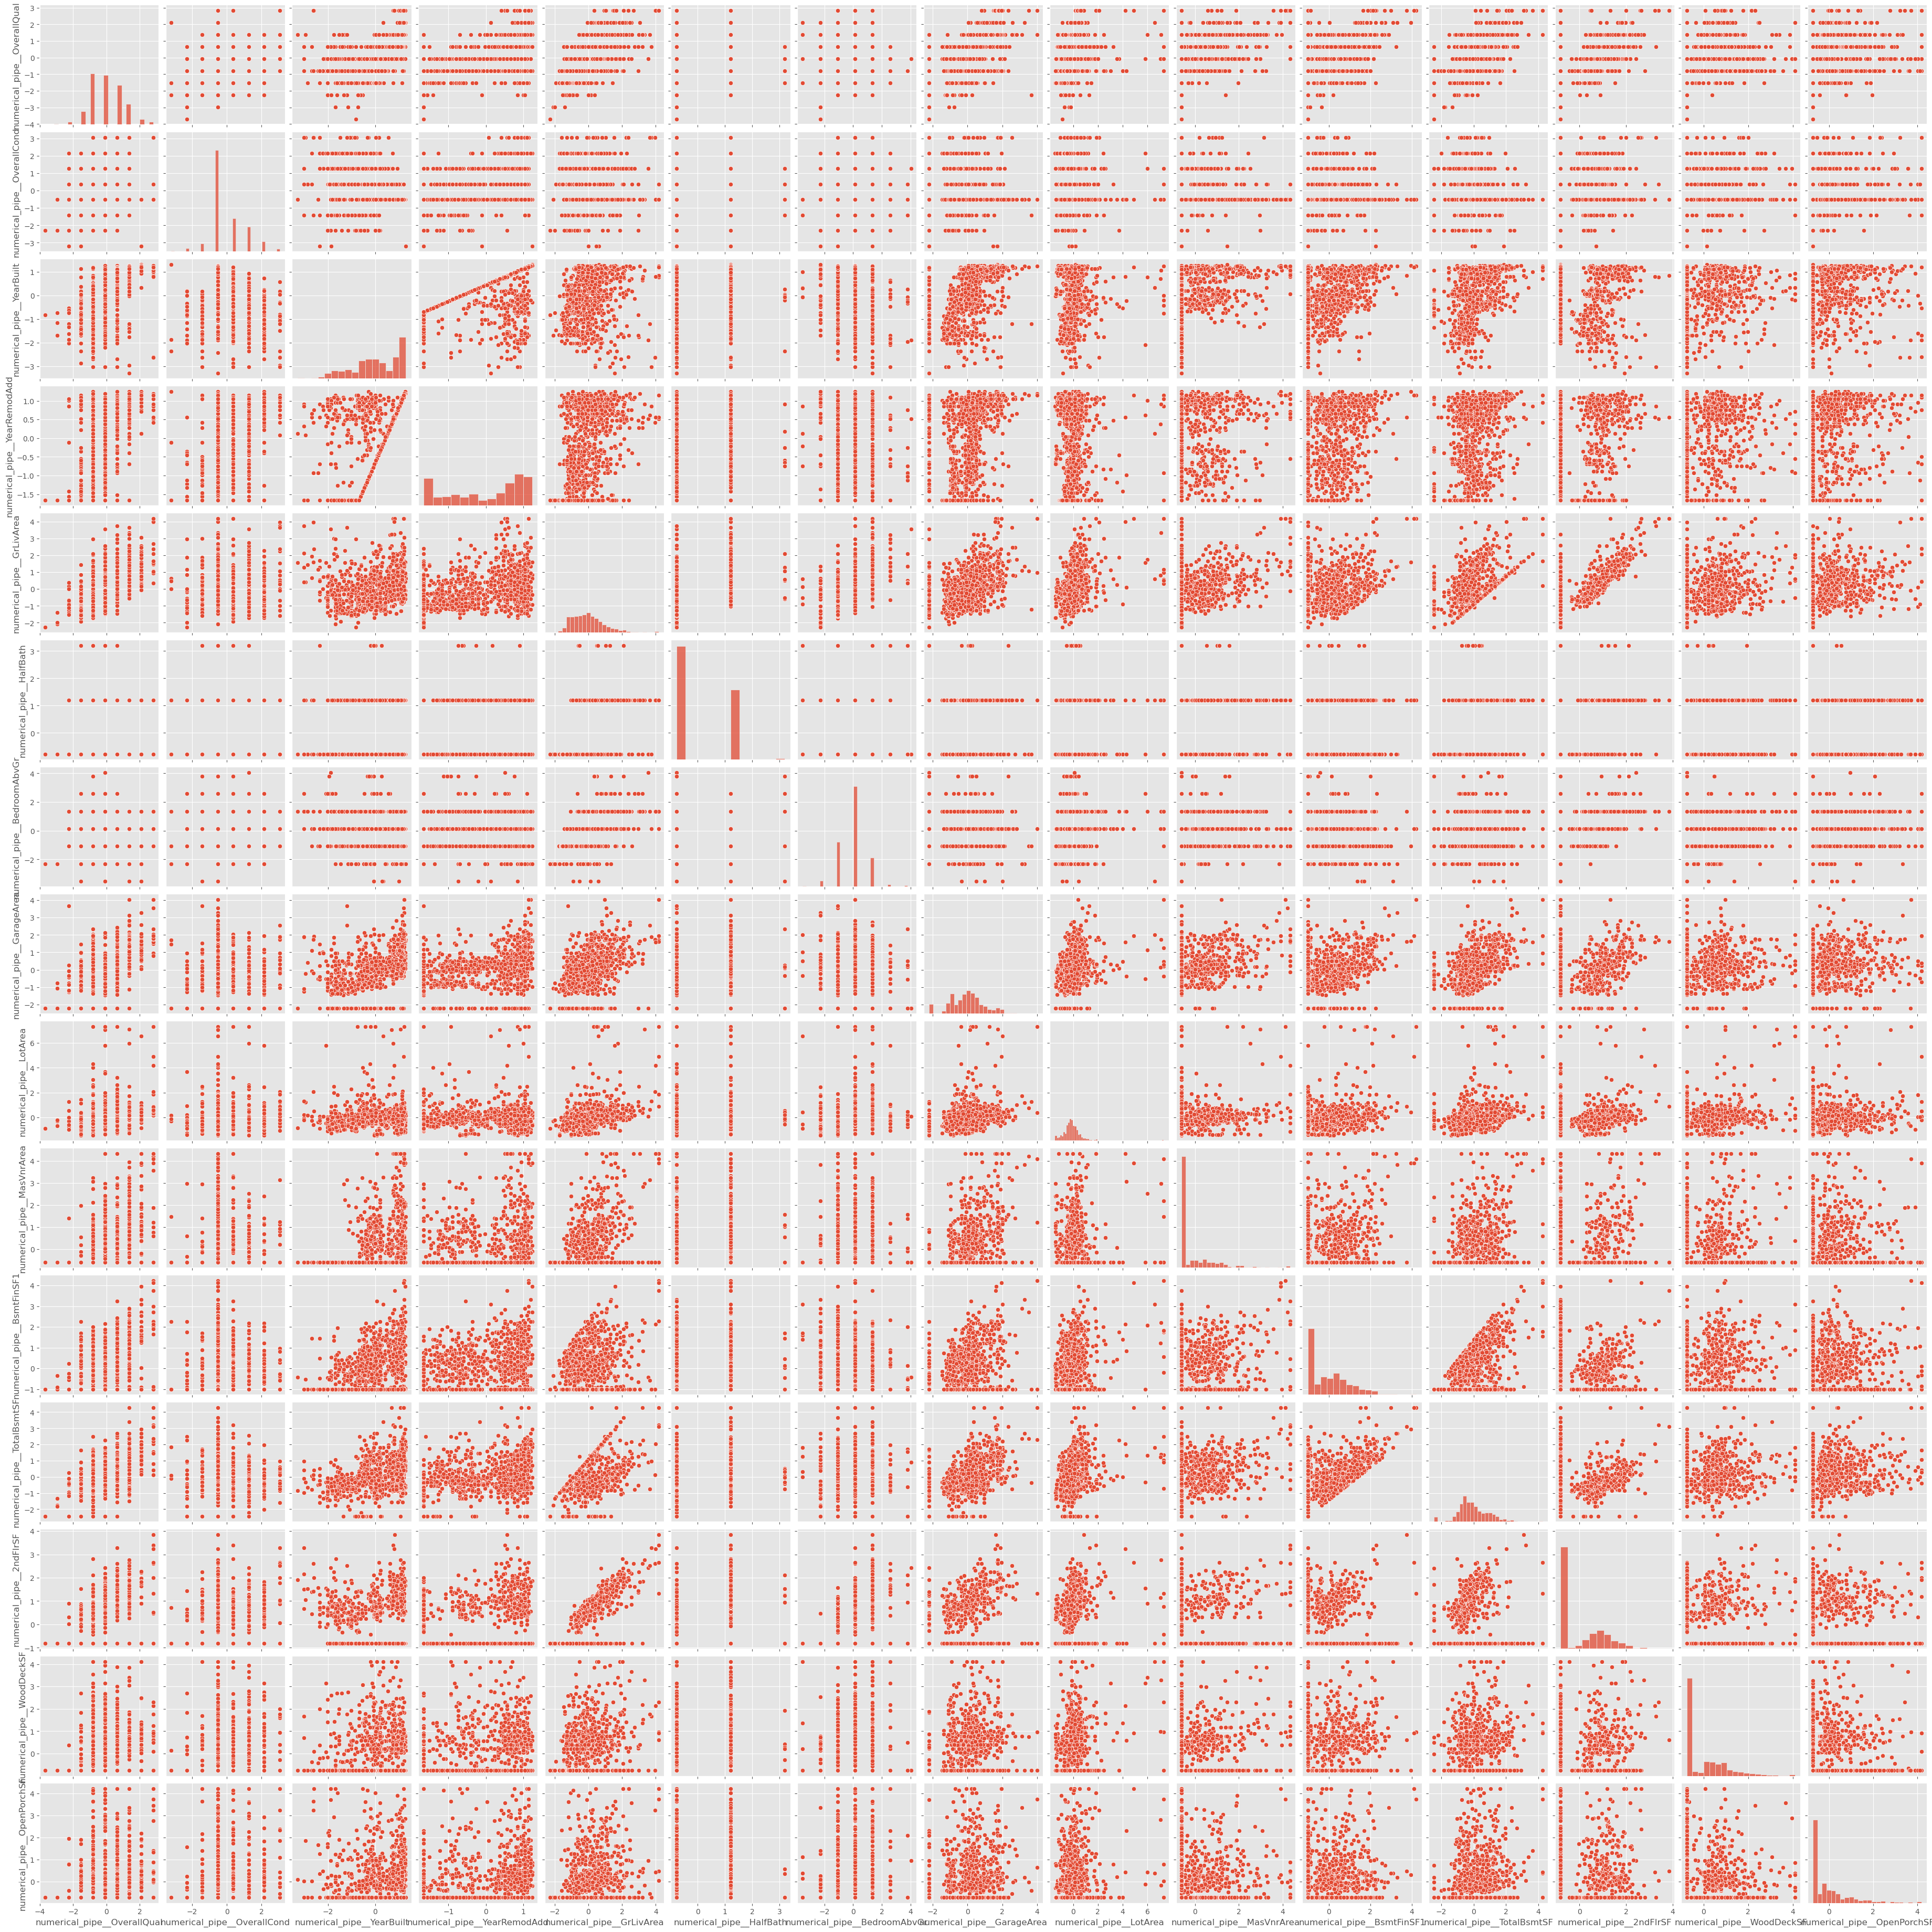

In [9]:
sns.pairplot(df.filter(like='numerical_pipe'))

In [88]:
# for col in X_train.columns[X_train.columns.str.contains('numerical_pipe')]:
#     print(col)
#     sns.boxplot(data=df, x='SalePrice', hue=col)
#     plt.show()

categorical_pipe__ExterQual_TA


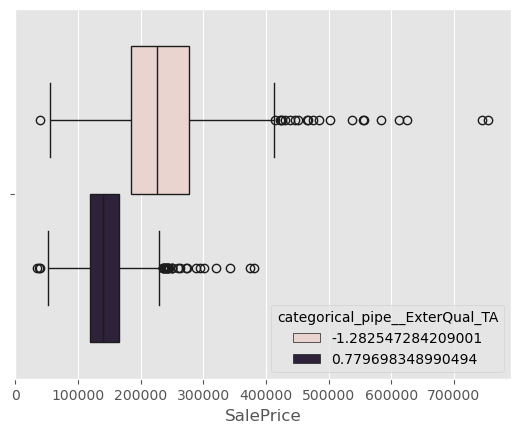

categorical_pipe__ExterQual_Gd


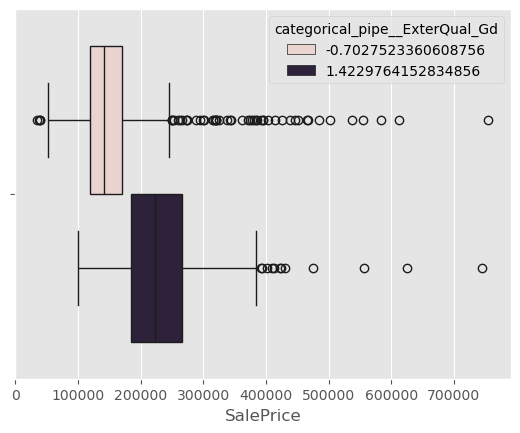

categorical_pipe__Foundation_PConc


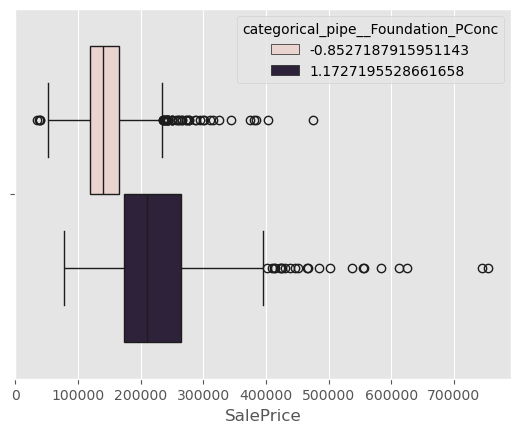

categorical_pipe__Foundation_CBlock


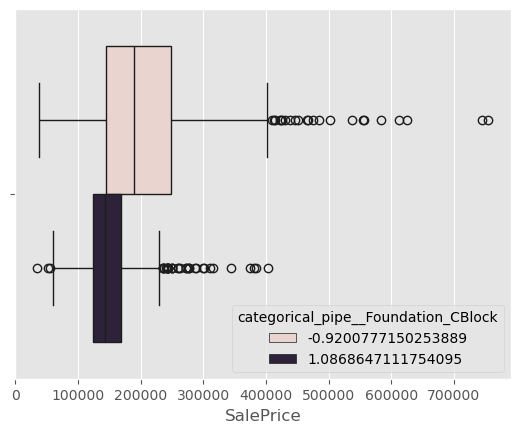

categorical_pipe__BsmtQual_TA


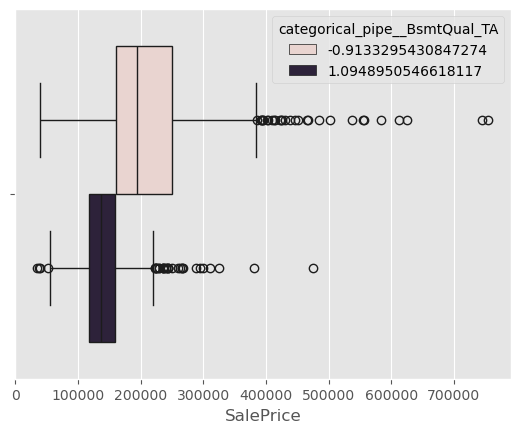

categorical_pipe__BsmtQual_Gd


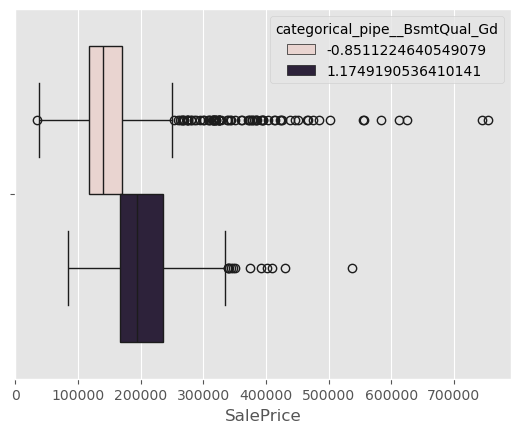

categorical_pipe__BsmtCond_TA


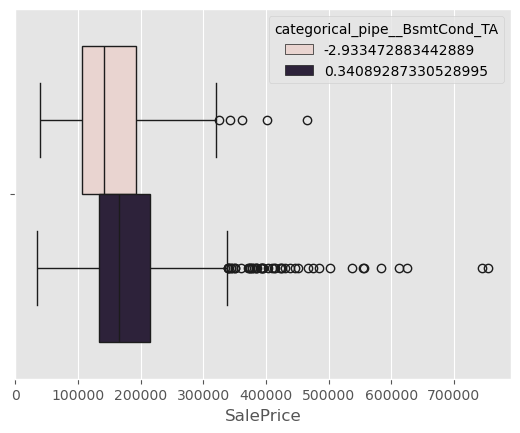

categorical_pipe__BsmtExposure_No


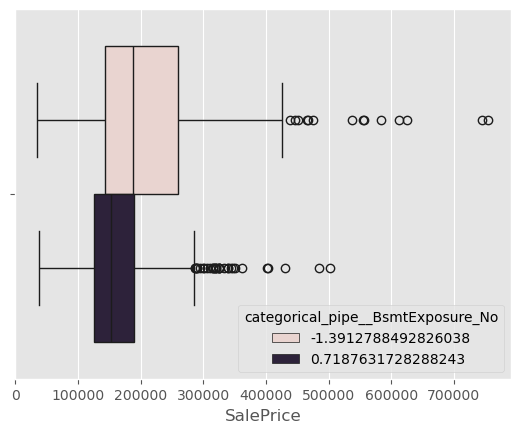

categorical_pipe__Heating_GasA


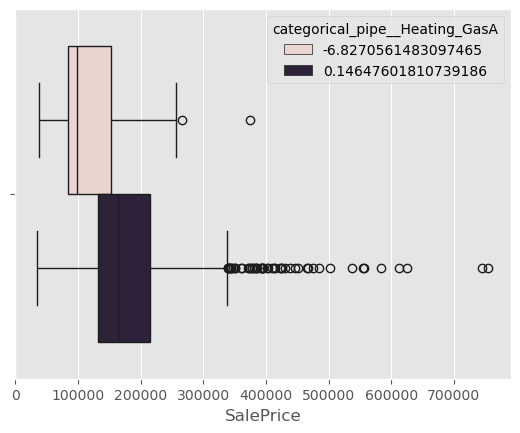

categorical_pipe__CentralAir_Y


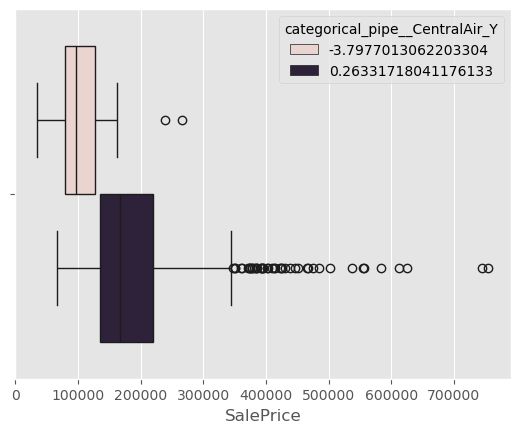

categorical_pipe__KitchenQual_TA


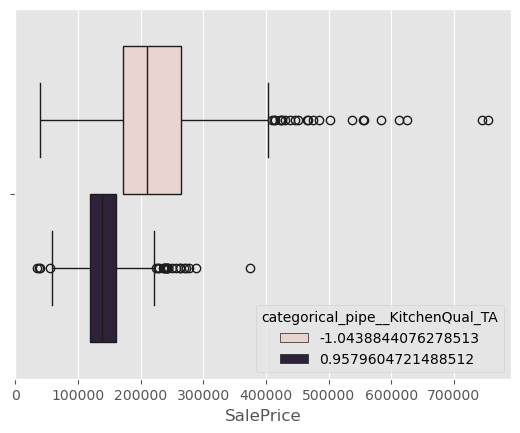

categorical_pipe__KitchenQual_Gd


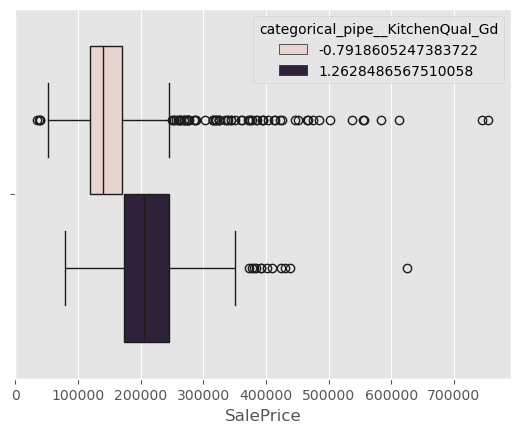

categorical_pipe__GarageType_Rare


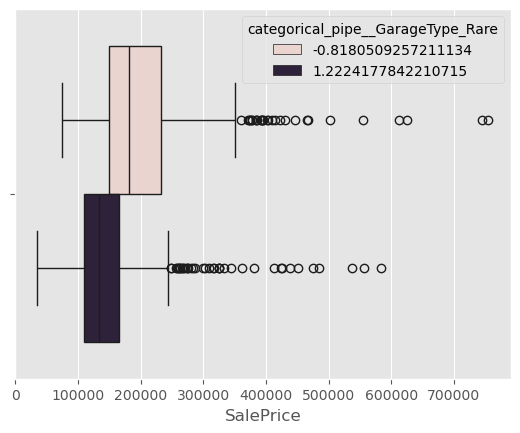

categorical_pipe__GarageFinish_Unf


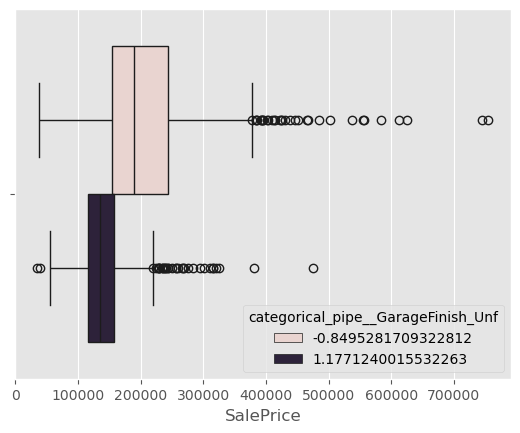

categorical_pipe__GarageQual_TA


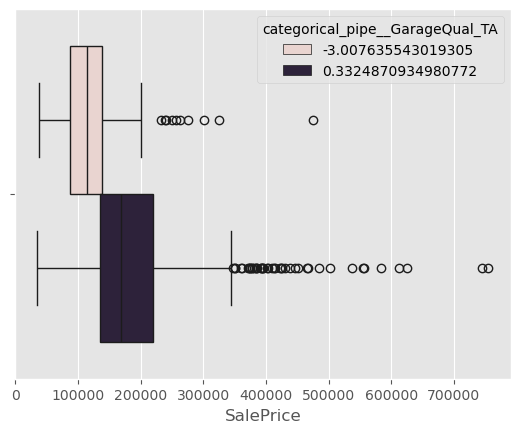

categorical_pipe__SaleType_WD


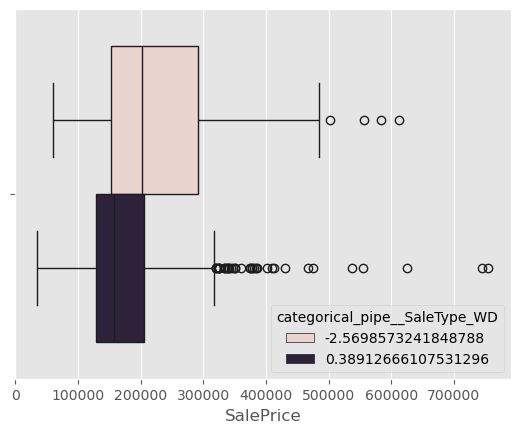

categorical_pipe__SaleCondition_Normal


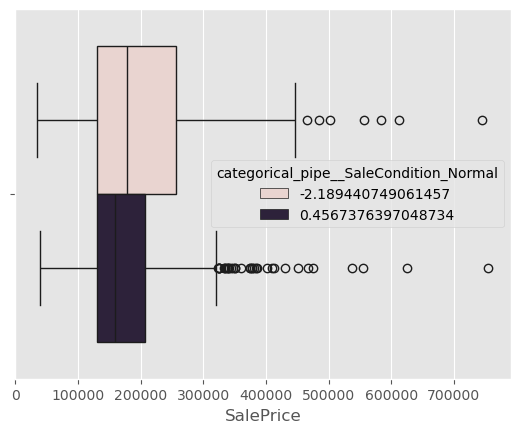

categorical_pipe__HouseStyle_1Story


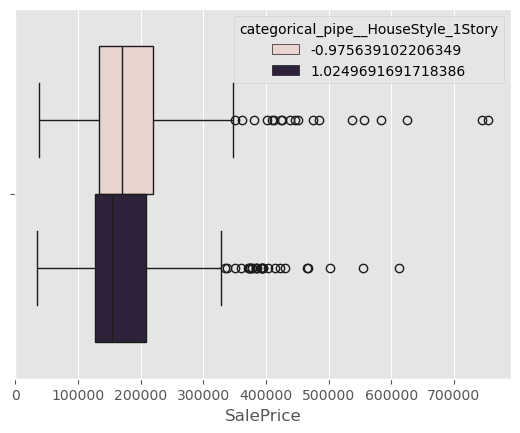

categorical_pipe__HouseStyle_Rare


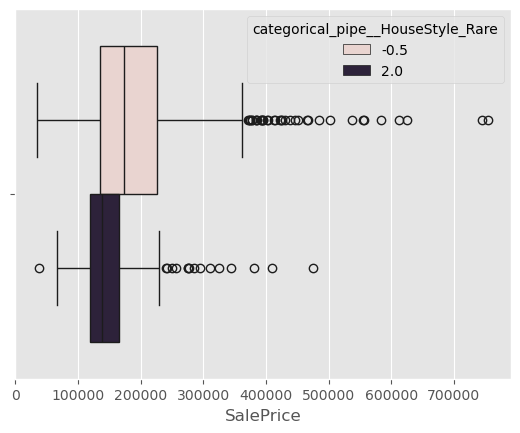

In [10]:
for col in X_train.columns[X_train.columns.str.contains('categorical_pipe')]:
    print(col)
    sns.boxplot(data=df, x='SalePrice', hue=col)
    plt.show()

numerical_pipe__OverallQual


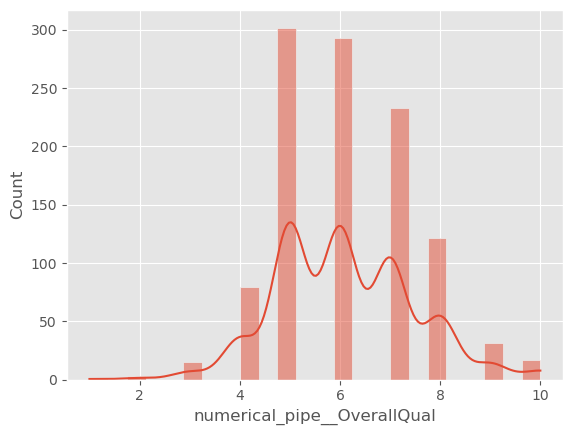

numerical_pipe__GrLivArea


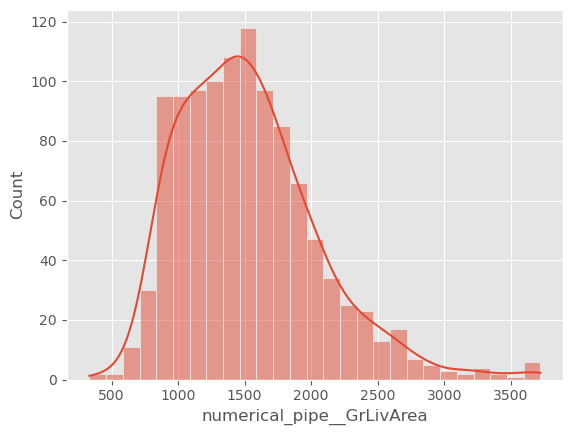

numerical_pipe__GarageAreaMod


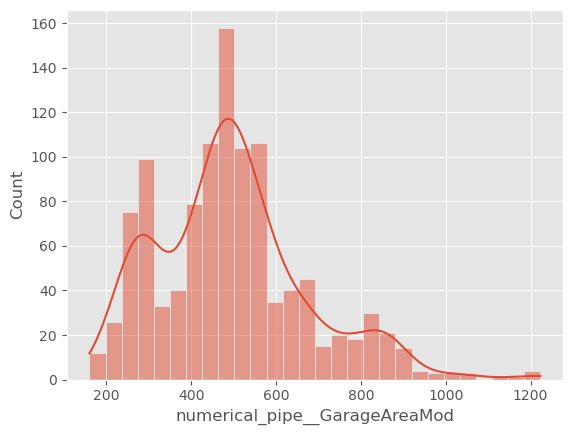

numerical_pipe__1stFlrSF


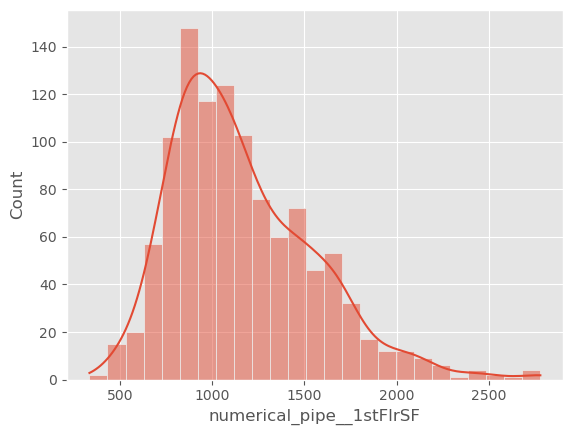

numerical_pipe__YearBuilt


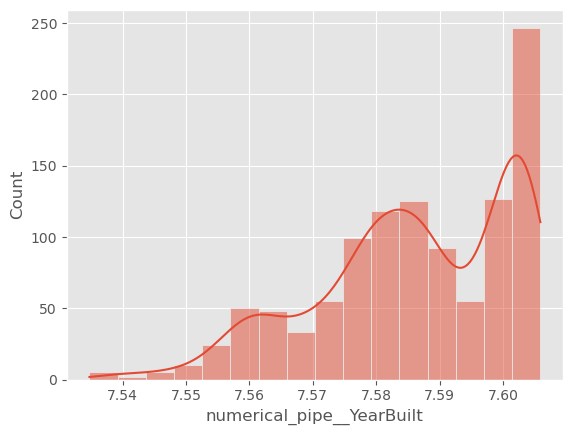

In [90]:
for col in X_train.columns[X_train.columns.str.contains('numerical_pipe')]:
    print(col)
    sns.histplot(data=X_train[col], kde=True)
    plt.show()

<Axes: ylabel='Count'>

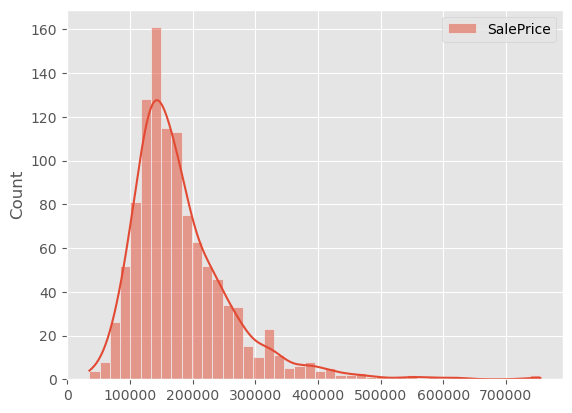

In [91]:
sns.histplot(y_train, kde=True)

In [92]:
df.columns

Index(['numerical_pipe__OverallQual', 'numerical_pipe__GrLivArea',
       'numerical_pipe__GarageAreaMod', 'numerical_pipe__1stFlrSF',
       'numerical_pipe__YearBuilt', 'categorical_pipe__ExterQual_TA',
       'categorical_pipe__ExterQual_Gd', 'categorical_pipe__Foundation_PConc',
       'categorical_pipe__Foundation_CBlock', 'categorical_pipe__BsmtQual_TA',
       'categorical_pipe__BsmtQual_Gd', 'categorical_pipe__Heating_GasA',
       'categorical_pipe__CentralAir_Y', 'categorical_pipe__KitchenQual_TA',
       'categorical_pipe__KitchenQual_Gd',
       'categorical_pipe__GarageFinish_Unf',
       'categorical_pipe__GarageFinish_Fin', 'SalePrice'],
      dtype='object')

C:\Users\gustavo\AppData\Local\Temp\ipykernel_21472\3120116330.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


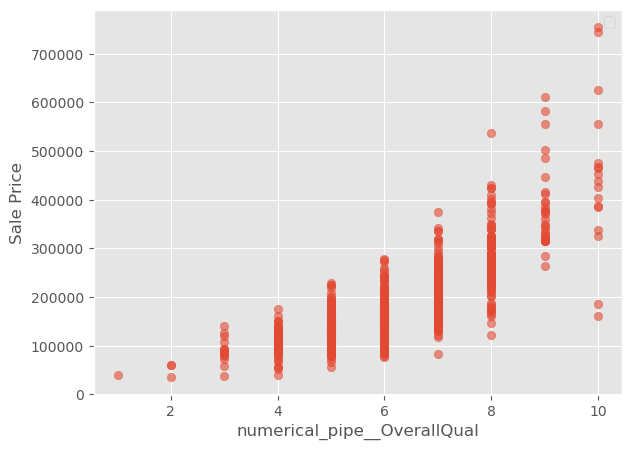

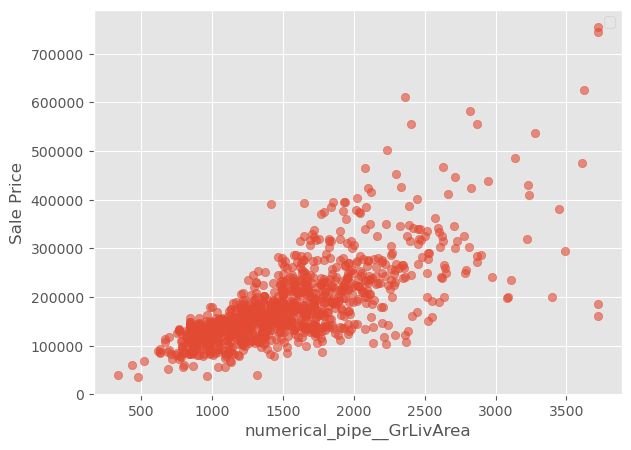

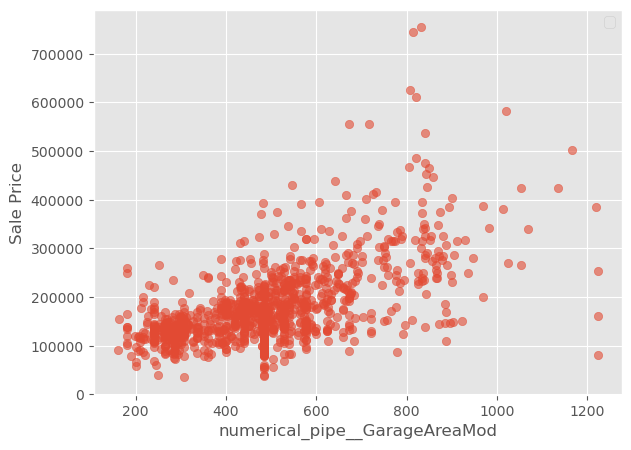

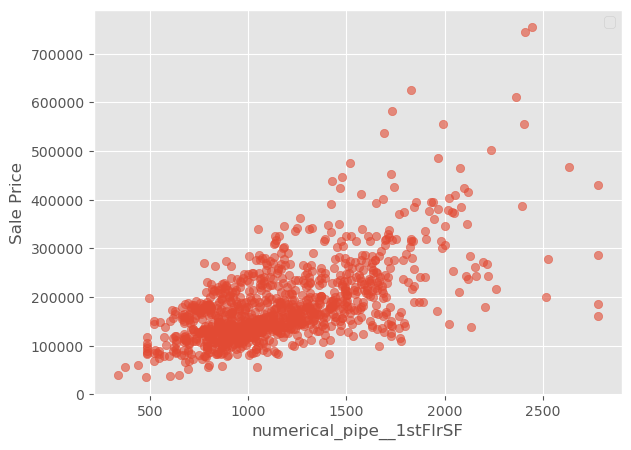

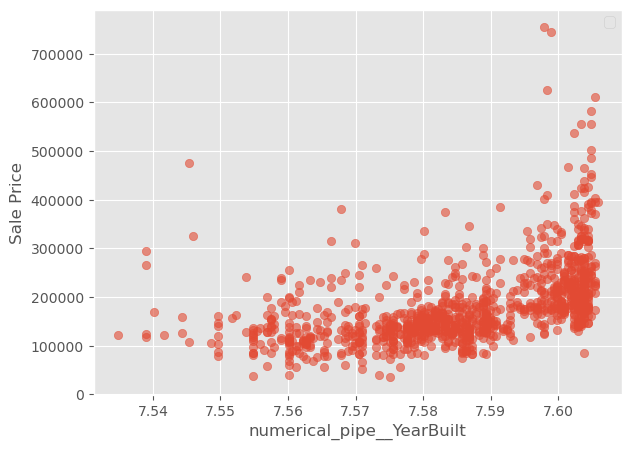

In [93]:
for col in X_train.columns[X_train.columns.str.contains('numerical_pipe')]:
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(df[col], df['SalePrice'], alpha=0.6)
    plt.xlabel(col)
    plt.ylabel('Sale Price')

    # Add some guidelines to spot outliers
    # plt.axvline(x=4000, color='red', linestyle='--', alpha=0.7, label='Potential outlier threshold')
    plt.legend()